## CHSH SIMULATION VIOLATING THE BELL INEQUALITY


The CHSH game was proposed by Clauser, Horne, Shimony, and Holt demonstrates the violation of Bell's inequality, which fundamentally distinguishes quantum mechanics from classical physics.

WHAT is CHSH Game ?


The CHSH game is a thought experiment that is often used to illustrate the concept of quantum entanglement
The CHSH game is a game of strategy between two players, Alice and Bob. Alice and Bob
are given a set of possible inputs x,y∈{0,1} ,
where Alice produces an output 
𝑎∈{0,1} based on her input x and Bob produces an output b{0,1} 
without communicating with each other.

Win Condition: Alice and Bob win if:
𝑎⊕𝑏=𝑥∧𝑦
where ⊕ is the XOR operation and ∧ is the AND operation.

and they must produce a set of possible outputs. The goal
of the game is to maximize the probability of winning, which is defined as follows

The optimal classical strategy cannot achieve a win probability exceeding 75% over many rounds.
This 75% limit is due to Bell's inequality, which constrains classical correlations.

$
|\Psi⟩ = \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)
$

introducing the Quantum Correlation to acheive the win probability
exceeding the probability of 75%  




## This below code is implemented using Numpy in order prove the CHSH Algorithm 

In [7]:
import numpy as np 
#classical strategy 
def classical_CHSH():
    win_count=0
    trials=10000

    for _ in range(trials):
        # generate random bits
        x,y=np.random.randint(0,2,2) 
        a,b=0,0
        if (a^b)==(x*y):
            win_count+=1
    
    win_prob=win_count/trials

    return win_prob

# Quantum CHSH Strategy
def quantum_CHSH():
    win_count = 0
    trials = 100000  # Increase trials for better accuracy
    
    # Define measurement angles
    theta_a = [0, np.pi / 4]  # Alice's angles
    theta_b = [np.pi / 8, -np.pi / 8]  # Bob's angles (CORRECTED)
    
    for _ in range(trials):
        # Generate random questions (x, y)
        x, y = np.random.randint(0, 2, 2)
        
        # Select measurement angles based on questions
        angle_a = theta_a[x]
        angle_b = theta_b[y]
        
        # Compute quantum correlation probability for outcome a XOR b = x AND y
        winning_condition = x * y  # x AND y
        prob_win = 0.5 * (1 + (-1)**winning_condition * np.cos(2 * (angle_a - angle_b)))
        
        # Clamp probability to valid range [0, 1]
        prob_win = np.clip(prob_win, 0, 1)
        
        # Simulate the quantum outcome
        if np.random.rand() < prob_win:
            win_count += 1

    # Calculate winning probability
    win_prob = win_count / trials
    return win_prob

# Results
print(f"Classical Winning Probability: {classical_CHSH() * 100:.2f}%")
print(f"Quantum Winning Probability (Corrected Angles): {quantum_CHSH() * 100:.2f}%")


Classical Winning Probability: 74.93%
Quantum Winning Probability (Corrected Angles): 85.25%


## implementation of CHSH ALGORITHM SATISFYING THE CRITERIA OF QUANTUM STRATEGY OF CHSH GAME VIOLATING BELL INEQUALITY

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt



In [9]:
# Function to create the Bell state
def create_bell_state():
    qc = QuantumCircuit(2, 2)  # 2 qubits and 2 classical bits
    qc.h(0)  # Hadamard gate on Alice's qubit
    qc.cx(0, 1)  # CNOT gate to entangle Alice and Bob
    return qc


In [10]:
# Function to apply measurement settings based on the angle
def apply_measurement(qc, x, y):
    # Define the measurement angles based on the strategy
    # Alice's angles (separated by pi/4)
    theta_A0 = 0
    theta_A1 = np.pi / 4

    # Bob's angles (separated by pi/8 and -pi/8)
    theta_B0 = np.pi / 8
    theta_B1 = -np.pi / 8

    # Apply the rotations based on the inputs
    if x == 0 and y == 0:
        qc.ry(-2 * theta_A0, 0)  # Rotation for Alice
        qc.ry(-2 * theta_B0, 1)  # Rotation for Bob
    elif x == 0 and y == 1:
        qc.ry(-2 * theta_A0, 0)  # Rotation for Alice
        qc.ry(-2 * theta_B1, 1)  # Rotation for Bob
    elif x == 1 and y == 0:
        qc.ry(-2 * theta_A1, 0)  # Rotation for Alice
        qc.ry(-2 * theta_B0, 1)  # Rotation for Bob
    elif x == 1 and y == 1:
        qc.ry(-2 * theta_A1, 0)  # Rotation for Alice
        qc.ry(-2 * theta_B1, 1)  # Rotation for Bob

    # Measure the qubits
    qc.measure([0, 1], [0, 1])


In [11]:
# Simulate the CHSH game
def CHSH_game(rounds=1000,shots=1024):
    simulator = AerSimulator()
    wins = 0
    all_counts = []

    for _ in range(rounds):
        # Random inputs x, y
        x = np.random.randint(0, 2)
        y = np.random.randint(0, 2)

        # Create Bell state
        qc = create_bell_state()

        # Apply measurement settings
        apply_measurement(qc, x, y)

        # Visualize the circuit for the first round
        if _ == 0:
            print("Quantum Circuit for the CHSH Game (First Round):")
            
            display(qc.draw(output='mpl'))
            plt.show()

        # Execute the circuit
        result = simulator.run(qc, shots=shots).result()
        counts = result.get_counts()
        all_counts.append(counts)

        # Get measurement outcome
        outcome = list(counts.keys())[0]  # Extract the measurement result
        a = int(outcome[1])  # Alice's result
        b = int(outcome[0])  # Bob's result

        # Check win condition: a ⊕ b == x ∧ y
        if (a ^ b) == (x & y):
            wins += 1

    # Aggregate counts for visualization
    aggregated_counts = {}
    for counts in all_counts:
        for key, value in counts.items():
            if key in aggregated_counts:
                aggregated_counts[key] += value
            else:
                aggregated_counts[key] = value

    # Plot histogram of results
    if aggregated_counts:  # Ensure there is data to plot
        print("Histogram of Measurement Results:")
        display(plot_histogram(aggregated_counts))
        plt.show()
    else:
        print("No measurement results to display.")

    # Calculate winning probability
    return wins / rounds


Quantum Circuit for the CHSH Game (First Round):


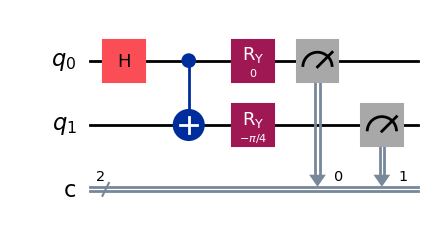

Histogram of Measurement Results:


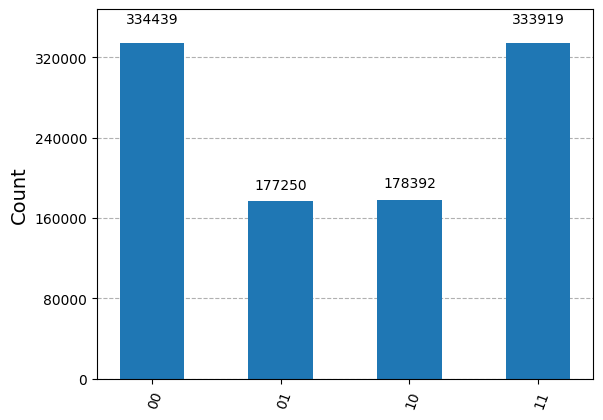

Quantum Winning Probability: 84.60%


In [12]:
# Run the simulation
quantum_win_prob = CHSH_game(rounds=1000)
print(f"Quantum Winning Probability: {quantum_win_prob * 100:.2f}%")


PROOF OF BELL INEQUALITY violation  by defining the angles of Alice and bob 

In [ ]:
# Function to create the Bell state
def create_bell_state():
    qc = QuantumCircuit(2, 2)  # 2 qubits and 2 classical bits
    qc.h(0)  # Hadamard gate on Alice's qubit
    qc.cx(0, 1)  # CNOT gate to entangle Alice and Bob
    return qc


In [ ]:
# Function to apply measurement settings based on the angles
def apply_measurement(qc, x, y):
    # Define the measurement angles for Alice and Bob
    theta_A0 = 0
    theta_A1 = np.pi / 4
    theta_B0 = np.pi / 8
    theta_B1 = -np.pi / 8

    # Apply rotations based on the measurement settings
    if x == 0 and y == 0:
        qc.ry(-2 * theta_A0, 0)
        qc.ry(-2 * theta_B0, 1)
    elif x == 0 and y == 1:
        qc.ry(-2 * theta_A0, 0)
        qc.ry(-2 * theta_B1, 1)
    elif x == 1 and y == 0:
        qc.ry(-2 * theta_A1, 0)
        qc.ry(-2 * theta_B0, 1)
    elif x == 1 and y == 1:
        qc.ry(-2 * theta_A1, 0)
        qc.ry(-2 * theta_B1, 1)

    # Add measurement to the circuit
    qc.measure([0, 1], [0, 1])

In [15]:
# Function to calculate the CHSH value and other details
def CHSH_game(rounds=1000):
    simulator = AerSimulator()
    expectation_values = {}
    all_results = {}

    # Calculate probabilities for different measurement combinations
    for x in range(2):
        for y in range(2):
            counts = {0: 0, 1: 0}

            # Run the circuit for each combination of x and y
            for _ in range(rounds):
                qc = create_bell_state()
                apply_measurement(qc, x, y)
                result = simulator.run(qc, shots=1).result()
                outcome = list(result.get_counts().keys())[0]
                a = int(outcome[1])  # Alice's result
                b = int(outcome[0])  # Bob's result
                parity = (a ^ b)  # Parity of a ⊕ b
                counts[parity] += 1

                # Save the circuit and result for the first x, y
                if x == 0 and y == 0 and _ == 0:
                    print("Quantum Circuit for E(0,0):")
                    display(qc.draw(output='mpl'))
                    plt.show()
                
                if x==0 and y==1 and _==1:
                    print("Quantum Circuit for E(0,1):")
                    display(qc.draw(output='mpl'))
                    plt.show()
                
                if x==1 and y==0 and _==0:
                    print("Quantum Circuit for E(1,0):")
                    display(qc.draw(output='mpl'))
                    plt.show()

                if x==1 and y==1 and _==1:
                    print("Quantum Circuit for E(1,1):")
                    display(qc.draw(output='mpl'))
                    plt.show()


            # Calculate expectation value E(x, y)
            prob_0 = counts[0] / rounds  # Probability of parity = 0
            prob_1 = counts[1] / rounds  # Probability of parity = 1
            expectation_values[(x, y)] = prob_0 - prob_1
            all_results[(x, y)] = {"P(0)": prob_0, "P(1)": prob_1, "Counts": counts}

    # Calculate the CHSH inequality value
    S = (
        expectation_values[(0, 0)]
        + expectation_values[(0, 1)]
        + expectation_values[(1, 0)]
        - expectation_values[(1, 1)]
    )
    return S, expectation_values, all_results

Quantum Circuit for E(0,0):


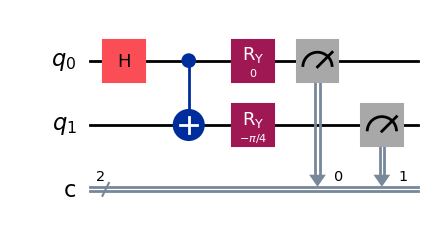

Quantum Circuit for E(0,1):


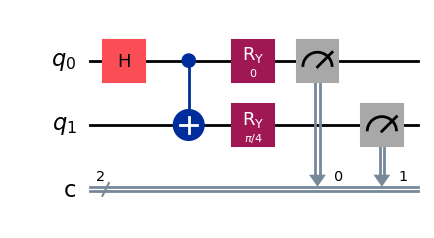

Quantum Circuit for E(1,0):


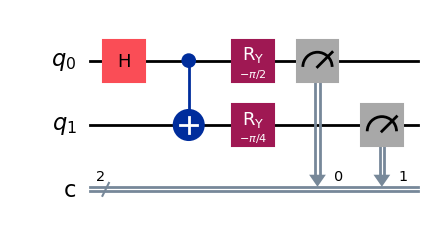

Quantum Circuit for E(1,1):


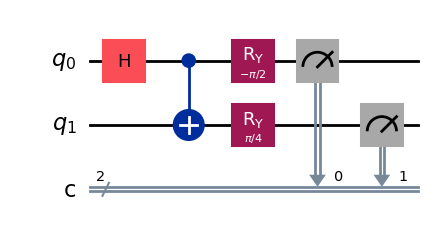

Expectation Values:
E(0, 0) = 0.7200
E(0, 1) = 0.7080
E(1, 0) = 0.6920
E(1, 1) = -0.7240

CHSH Inequality Value S = 2.8440
The CHSH inequality is violated, demonstrating quantum entanglement.

Measurement Results:
For inputs x=0, y=0:
  P(0) = 0.8600, P(1) = 0.1400
  Counts: {0: 860, 1: 140}


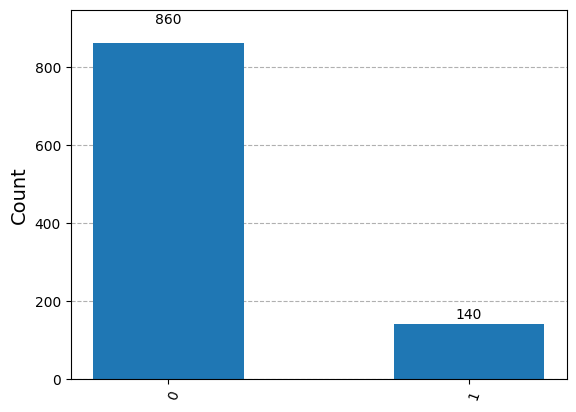

For inputs x=0, y=1:
  P(0) = 0.8540, P(1) = 0.1460
  Counts: {0: 854, 1: 146}


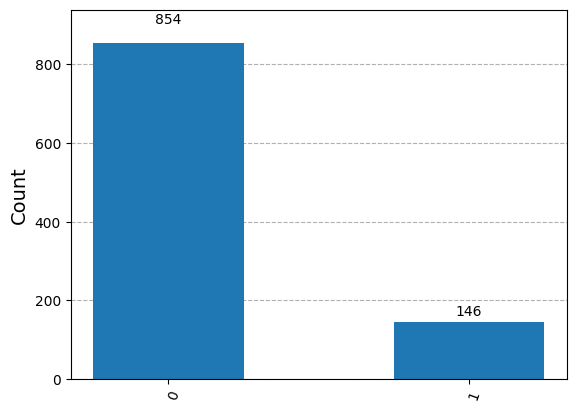

For inputs x=1, y=0:
  P(0) = 0.8460, P(1) = 0.1540
  Counts: {0: 846, 1: 154}


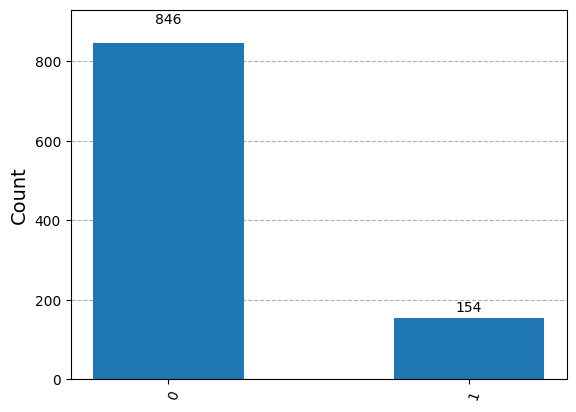

For inputs x=1, y=1:
  P(0) = 0.1380, P(1) = 0.8620
  Counts: {0: 138, 1: 862}


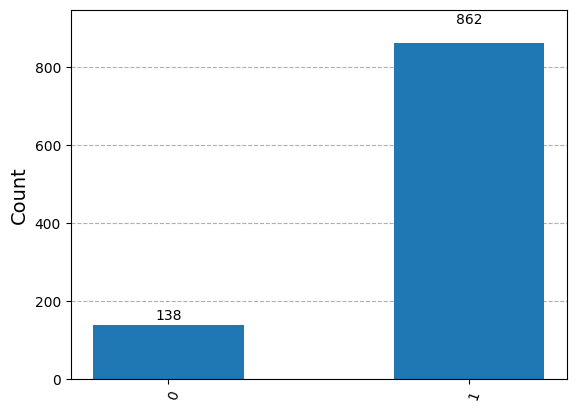

In [18]:
# Run the simulation
rounds = 1000
S, expectation_values, all_results = CHSH_game(rounds)

# Display results
print("Expectation Values:")
for key, value in expectation_values.items():
    print(f"E({key[0]}, {key[1]}) = {value:.4f}")

print(f"\nCHSH Inequality Value S = {S:.4f}")
if abs(S) > 2:
    print("The CHSH inequality is violated, demonstrating quantum entanglement.")
else:
    print("The CHSH inequality is not violated.")

# Display probability values and counts for each combination
print("\nMeasurement Results:")
for key, results in all_results.items():
    print(f"For inputs x={key[0]}, y={key[1]}:")
    print(f"  P(0) = {results['P(0)']:.4f}, P(1) = {results['P(1)']:.4f}")
    print(f"  Counts: {results['Counts']}")

    # Plot histogram of counts
    display(plot_histogram(results['Counts']))



Explanation:
Classical physics predicts that the CHSH inequality value S must be ≤ 2. Quantum mechanics, however, allows for S values up to 2√2 ≈ 2.828 due to entanglement. The violation observed here confirms the non-classical correlations in the Bell state.
